In [7]:
import os
import pandas as pd

In [8]:

raw_path = "../data/raw"

print("📂 Existiert data/raw?:", os.path.exists(raw_path))
print("📄 Dateien darin:", os.listdir(raw_path))


📂 Existiert data/raw?: True
📄 Dateien darin: ['^GDAXI.csv', 'HG=F.csv', 'ETH-USD.csv', 'PA=F.csv', 'BTC-USD.csv', 'NG=F.csv', 'AMZN.csv', 'SAP.DE.csv', 'SI=F.csv', 'CL=F.csv', '.gitkeep', 'MSFT.csv', 'NVDA.csv', 'GC=F.csv', 'PL=F.csv', 'ASML.AS.csv', 'DOGE-USD.csv', '^GSPC.csv', 'TSLA.csv', '^VIX.csv', 'META.csv', 'SOL-USD.csv', '^NDX.csv', 'BNB-USD.csv', 'AAPL.csv', '^DJI.csv']


In [9]:
# -----------------------------------------------
# 1) Dateinamen auswählen, den wir analysieren wollen
# -----------------------------------------------
btc_file = "BTC-USD.csv"  # Wir starten mit Bitcoin, Datei aus data/raw

In [10]:
# -----------------------------------------------
# 2) Vollständigen Pfad zur Datei bauen
#    (raw_path kommt aus der vorherigen Zelle: "../data/raw")
# -----------------------------------------------
btc_path = os.path.join(raw_path, btc_file)  # ergibt z.B. "../data/raw/BTC-USD.csv"

In [11]:
# -----------------------------------------------
# 3) Zur Kontrolle: Pfad einmal ausgeben
# -----------------------------------------------
print("📁 Verwende Datei:", btc_path)

📁 Verwende Datei: ../data/raw/BTC-USD.csv


In [12]:
# -----------------------------------------------
# 4) CSV mit pandas einlesen
# -----------------------------------------------
df_btc = pd.read_csv(btc_path)  # liest die CSV in ein DataFrame

In [13]:
# -----------------------------------------------
# 5) Erste Zeilen anzeigen, um zu sehen, wie die Daten aussehen
# -----------------------------------------------
print("👀 Erste 5 Zeilen:")
display(df_btc.head())  # in Jupyter/VS Code zeigt das schön formatiert die ersten Zeilen

👀 Erste 5 Zeilen:


,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700


In [14]:
# -----------------------------------------------
# 6) Struktur der Daten prüfen (Spalten, Datentypen, Anzahl Zeilen)
# -----------------------------------------------
print("\nℹ️ DataFrame-Info:")
df_btc.info()  # zeigt Datentypen, Anzahl Einträge pro Spalte usw.



ℹ️ DataFrame-Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   4092 non-null   object
 1   Close   4091 non-null   object
 2   High    4091 non-null   object
 3   Low     4091 non-null   object
 4   Open    4091 non-null   object
 5   Volume  4091 non-null   object
dtypes: object(6)
memory usage: 191.9+ KB


In [15]:
# --------------------------------------------------------
# 7) BTC-USD: Header-Müll entfernen und Datum reparieren
# --------------------------------------------------------

# Sicherstellen, dass wir mit einer Kopie arbeiten
df_btc_clean = df_btc.copy()

In [16]:
# 1) Zeilen entfernen, in denen in der Spalte "Price" nur Meta-Texte stehen
#    (also "Ticker" und "Date" – das sind keine echten Datenpunkte)
mask_meta = df_btc_clean["Price"].isin(["Ticker", "Date"])
df_btc_clean = df_btc_clean[~mask_meta].copy()

In [17]:
# 2) Spalte "Price" in "Date" umbenennen, weil dort eigentlich das Datum drinsteht
df_btc_clean.rename(columns={"Price": "Date"}, inplace=True)

In [18]:
# 3) "Date"-Spalte in echtes Datumsformat umwandeln
df_btc_clean["Date"] = pd.to_datetime(df_btc_clean["Date"])

In [19]:
# 4) Ergebnis prüfen: erste Zeilen anzeigen
print("✅ Bereinigte BTC-Daten (erste 5 Zeilen):")
display(df_btc_clean.head())

✅ Bereinigte BTC-Daten (erste 5 Zeilen):


,Date,Close,High,Low,Open,Volume
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
5,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
6,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100


In [20]:
# 5) Struktur der Daten prüfen (Datentypen etc.)
print("\nℹ️ DataFrame-Info nach Bereinigung:")
df_btc_clean.info()



ℹ️ DataFrame-Info nach Bereinigung:
<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 2 to 4091
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4090 non-null   datetime64[ns]
 1   Close   4090 non-null   object        
 2   High    4090 non-null   object        
 3   Low     4090 non-null   object        
 4   Open    4090 non-null   object        
 5   Volume  4090 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 223.7+ KB


In [21]:
# --------------------------------------------------------
# 6) Numerische Spalten in echte Zahlen umwandeln
# --------------------------------------------------------

# Liste der numerischen Spalten
num_cols = ["Open", "High", "Low", "Close", "Volume"]

In [22]:
# Jede numerische Spalte zu float konvertieren
for col in num_cols:
    # remove commas, spaces etc.
    df_btc_clean[col] = (
        df_btc_clean[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
        .replace("Missing value", None)
    )
    
    # jetzt in float umwandeln
    df_btc_clean[col] = pd.to_numeric(df_btc_clean[col], errors="coerce")

In [24]:
# Kontrolle: Datentypen anzeigen
print("\nℹ️ DataFrame-Info nach Typ-Umwandlung:")
df_btc_clean.info()


ℹ️ DataFrame-Info nach Typ-Umwandlung:
<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 2 to 4091
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4090 non-null   datetime64[ns]
 1   Close   4090 non-null   float64       
 2   High    4090 non-null   float64       
 3   Low     4090 non-null   float64       
 4   Open    4090 non-null   float64       
 5   Volume  4090 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 223.7 KB


In [25]:
# --------------------------------------------------------
# 7) Daily Returns berechnen — Grundlage für ML-Modelle
# --------------------------------------------------------
# Daily Return beschreibt die prozentuale Veränderung des Preises
# von einem Tag zum nächsten.
#
# Mathematische Formel:
#     Return_t = (Close_t - Close_(t-1)) / Close_(t-1)
#
# Interpretation:
#  - positive Werte  → Preis ist gestiegen
#  - negative Werte  → Preis ist gefallen
#  - nahe 0          → kaum Bewegung
#
# Wichtig:
#  - erste Zeile ist NaN (es gibt keinen vorherigen Tag)
#  - wird später genutzt für:
#        * ML-Targets (steigt/fällt)
#        * Volatilität
#        * Backtesting
#        * Marktphasen-Analyse (K-Means)
#
# Pandas-Funktion:
#     .pct_change() berechnet exakt diese Formel automatisch
# --------------------------------------------------------

df_btc_clean["Return"] = df_btc_clean["Close"].pct_change()

print("📈 Erste 10 Returns:")
display(df_btc_clean[["Date", "Close", "Return"]].head(10))

📈 Erste 10 Returns:


,Date,Close,Return
2,2014-09-17,457.334015,NaN
3,2014-09-18,424.440002,-0.071926
4,2014-09-19,394.795990,-0.069843
5,2014-09-20,408.903992,0.035735
6,2014-09-21,398.821014,-0.024659
7,2014-09-22,402.152008,0.008352
8,2014-09-23,435.790985,0.083647
9,2014-09-24,423.204987,-0.028881
10,2014-09-25,411.574005,-0.027483
11,2014-09-26,404.424988,-0.017370


In [54]:
# --------------------------------------------------------
# 8) Rolling Features berechnen (Trend + Volatilität)
# --------------------------------------------------------
# Warum Rolling Features?
# Sie beschreiben:
#   ✔ kurzfristige Trends  (MA7)
#   ✔ kurze Trends         (MA21)
#   ✔ mittelfristige Trends (MA50)
#   ✔ langfristige Trends   (MA200)
#   ✔ Marktvolatilität      (30-Tage Std der Returns)
#   ✔ Momentum              (7-Tage kumulierte Returns)
#
# Mathematische Grundideen:
#   Moving Average (MA_N):
#       MA_t = (Summe der letzten N Close-Preise) / N
#
#   Volatilität (Std):
#       Vol_t = sqrt( 1/N * Σ (Return_i - Mean_Return)^2 )
#
#   Rolling Momentum (z.B. 7 Tage):
#       Mom_t = Σ(Return_i der letzten 7 Tage)
# --------------------------------------------------------

# 7-Tage Moving Average (sehr kurzfristig)
df_btc_clean["MA7"] = df_btc_clean["Close"].rolling(window=7).mean()

# 21-Tage Moving Average (ca. 1 Handelsmonat)
df_btc_clean["MA21"] = df_btc_clean["Close"].rolling(window=21).mean()

# 50-Tage Moving Average (mittelfristiger Trend, wichtig für Trader)
df_btc_clean["MA50"] = df_btc_clean["Close"].rolling(window=50).mean()

# 200-Tage Moving Average (langfristiger Trend, Standard an der Börse)
df_btc_clean["MA200"] = df_btc_clean["Close"].rolling(window=200).mean()

# Rolling Volatility (30 Tage) auf Basis der täglichen Returns
df_btc_clean["Volatility30"] = df_btc_clean["Return"].rolling(window=30).std()

# 7-Tage Momentum (Summe der Returns der letzten 7 Tage)
df_btc_clean["Momentum7"] = df_btc_clean["Return"].rolling(window=7).sum()


In [55]:
# --------------------------------------------------------
# 8.1) Spalten-Reihenfolge für df_btc_clean ordnen
#       (bessere Übersicht für ML + EDA)
# --------------------------------------------------------

clean_cols = [
    "Date",          # Zeitstempel
    "Open",          # Eröffnungspreis
    "High",          # Tageshoch
    "Low",           # Tagestief
    "Close",         # Schlusskurs
    "Volume",        # Handelsvolumen
    "Return",        # Prozentuale Veränderung (t/t-1)
    
    # Kurz- bis langfristige Trends
    "MA7",           # 7-Tage Moving Average (ultrakurz)
    "MA21",          # 21-Tage Moving Average (kurz)
    "MA50",          # 50-Tage Moving Average (mittelfristig)
    "MA200",         # 200-Tage Moving Average (langfristig, Standard)

    # Risiko & Dynamik
    "Volatility30",  # 30-Tage Volatilität
    "Momentum7"      # 7-Tage Momentum
]

# Nur Spalten übernehmen, die wirklich existieren
clean_cols_existing = [col for col in clean_cols if col in df_btc_clean.columns]

# Neue Spaltenreihenfolge anwenden
df_btc_clean = df_btc_clean[clean_cols_existing]


In [56]:
# Ausgabe der ersten Zeilen
display(df_btc_clean)

,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
2,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2025-11-23,84648.609375,88038.468750,84641.773438,86805.007812,58083435576,0.025478,88526.385045,97041.370908,106223.974687,110210.500117,0.022782,-0.079152
4088,2025-11-24,86798.773438,89206.335938,85272.195312,88270.562500,74433896110,0.016883,87980.197545,96171.039435,105519.116406,110135.645625,0.023106,-0.040149
4089,2025-11-25,88269.960938,88457.335938,86131.429688,87341.890625,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,110057.500820,0.022258,-0.059953
4090,2025-11-26,87345.585938,90581.156250,86316.898438,90518.367188,66496301869,0.036368,87043.824777,94855.701265,104152.243281,109986.611016,0.023721,-0.007631


In [57]:
# --------------------------------------------------------
# 9) Ausschnitt nach der "Aufwärmphase" anzeigen
#    (nur Zeilen, in denen ALLE Rolling-Features gültig sind)
# --------------------------------------------------------

# Warum gibt es eine "Aufwärmphase"?
# - Rolling-Features wie MA50 oder MA200 benötigen viele Datenpunkte.
#   MA50 braucht 50 Tage → Sinnvolle Werte erst ab Tag 50.
#   MA200 braucht 200 Tage → Sinnvolle Werte erst ab Tag 200!!
#
# Darum:
#   Für BTC-Daten (seit 2014) gibt es genug Historie.
#   Für eine Vorschau wählen wir einen Bereich, in dem alle Werte gefüllt sind.

start_row = 210   # ab hier hat selbst MA200 keine NaNs mehr!
end_row = 220     # 10-Zeilen-Vorschau

# Spalten für die Vorschau (vollständige Liste)
preview_cols = [
    "Date",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Return",
    "MA7",
    "MA21",
    "MA50",        # NEU
    "MA200",       # NEU
    "Volatility30",
    "Momentum7",
]

# Nur Spalten nehmen, die existieren (falls ein Asset weniger Daten hat)
preview_cols_existing = [c for c in preview_cols if c in df_btc_clean.columns]

print("📊 Ausschnitt nach der Aufwärmphase (ab Zeile ~210):")
display(df_btc_clean[preview_cols_existing].iloc[start_row:end_row])


📊 Ausschnitt nach der Aufwärmphase (ab Zeile ~210):


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
212,2015-04-15,219.072998,223.832993,218.649002,223.832993,22562000,0.021327,231.433143,244.068667,259.298341,301.209980,0.030302,-0.088171
213,2015-04-16,223.917007,229.671997,223.917007,228.572998,24805400,0.021177,229.275572,243.118239,259.120401,300.466940,0.030712,-0.061501
214,2015-04-17,228.574997,228.906006,221.942001,222.882004,20429800,-0.024898,227.391285,241.968382,258.849521,299.704015,0.025175,-0.055193
215,2015-04-18,222.852997,224.315994,220.876007,223.356003,12939000,0.002127,225.506143,240.566382,258.240081,298.886075,0.024853,-0.055100
216,2015-04-19,223.455994,226.352997,222.373001,222.600006,15021500,-0.003385,223.570001,239.608620,257.606821,298.081000,0.024809,-0.056798
217,2015-04-20,222.612000,226.350998,221.977005,224.626007,18364700,0.009102,223.575572,238.518144,256.895301,297.328770,0.024941,0.001280
218,2015-04-21,224.619995,235.268997,224.300995,235.268997,24978000,0.047381,225.877001,238.091715,256.087281,296.707555,0.025929,0.072830
219,2015-04-22,235.602005,237.908997,233.475998,234.175995,23847900,-0.004646,227.354573,237.468096,255.136761,296.234105,0.025929,0.046857
220,2015-04-23,234.052994,236.475006,233.199005,236.462006,17036000,0.009762,228.481574,236.680334,254.404161,295.813865,0.021780,0.035443
221,2015-04-24,235.970001,236.304993,229.932999,231.268005,21448700,-0.021965,229.679574,235.582525,253.505961,295.319810,0.022099,0.038375


In [58]:
display(df_btc_clean)

,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
2,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.071926,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,-0.069843,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.035735,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,-0.024659,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2025-11-23,84648.609375,88038.468750,84641.773438,86805.007812,58083435576,0.025478,88526.385045,97041.370908,106223.974687,110210.500117,0.022782,-0.079152
4088,2025-11-24,86798.773438,89206.335938,85272.195312,88270.562500,74433896110,0.016883,87980.197545,96171.039435,105519.116406,110135.645625,0.023106,-0.040149
4089,2025-11-25,88269.960938,88457.335938,86131.429688,87341.890625,64837343545,-0.010521,87179.199777,95492.533110,104770.903594,110057.500820,0.022258,-0.059953
4090,2025-11-26,87345.585938,90581.156250,86316.898438,90518.367188,66496301869,0.036368,87043.824777,94855.701265,104152.243281,109986.611016,0.023721,-0.007631


In [59]:
# Prüfen, welche Spalten aktuell im DataFrame sind
print("🔢 Spalten in df_btc_clean:")
print(df_btc_clean.columns.tolist())


🔢 Spalten in df_btc_clean:
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']


In [60]:
# --------------------------------------------------------
# 10) Anzeige-DataFrame (df_btc_view)
#     -> Nur für Darstellung / Dashboards / Streamlit
#     -> ML-Daten (df_btc_clean) bleiben UNVERÄNDERT
# --------------------------------------------------------

# 10.0 Kopie für Anzeige erstellen
df_btc_view = df_btc_clean.copy()

# --------------------------------------------------------
# 10.1 Spalten-Reihenfolge für Anzeige festlegen
#     -> Typisches Trading-Layout:
#        Date | Open | High | Low | Close | Volume | Indicators...
# --------------------------------------------------------
view_cols = [
    "Date",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Return",
    "MA7",
    "MA21",
    "MA50",        # NEU
    "MA200",       # NEU
    "Volatility30",
    "Momentum7",
]

# Nur Spalten verwenden, die existieren
view_cols_existing = [c for c in view_cols if c in df_btc_view.columns]
df_btc_view = df_btc_view[view_cols_existing]

# --------------------------------------------------------
# 10.2 Preise & Moving Averages runden
#     -> 2 Nachkommastellen wie an der Börse
# --------------------------------------------------------
price_cols = ["Open", "High", "Low", "Close", "MA7", "MA21", "MA50", "MA200"]
for col in price_cols:
    if col in df_btc_view.columns:
        df_btc_view[col] = df_btc_view[col].round(2)

# --------------------------------------------------------
# 10.3 Returns, Momentum & Volatilität runden
#     -> 4 Nachkommastellen (kleine Prozentwerte)
# --------------------------------------------------------
feature_cols = ["Return", "Momentum7", "Volatility30"]
for col in feature_cols:
    if col in df_btc_view.columns:
        df_btc_view[col] = df_btc_view[col].round(4)

# --------------------------------------------------------
# 10.4 Vorschau
# --------------------------------------------------------
print("📊 Vorschau df_btc_view (für Anzeige / Streamlit):")
display(df_btc_view.head(15))

print("\nℹ️ df_btc_clean bleibt für Machine Learning ungerundet erhalten.")



📊 Vorschau df_btc_view (für Anzeige / Streamlit):


,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
2,2014-09-17,465.86,468.17,452.42,457.33,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-18,456.86,456.86,413.10,424.44,34483200,-0.0719,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-19,424.10,427.83,384.53,394.80,37919700,-0.0698,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-09-20,394.67,423.30,389.88,408.90,36863600,0.0357,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-09-21,408.08,412.43,393.18,398.82,26580100,-0.0247,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-09-22,399.10,406.92,397.13,402.15,24127600,0.0084,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-09-23,402.09,441.56,396.20,435.79,45099500,0.0836,417.46,NaN,NaN,NaN,NaN,NaN
9,2014-09-24,435.75,436.11,421.13,423.20,30627700,-0.0289,412.59,NaN,NaN,NaN,NaN,-0.0676
10,2014-09-25,423.16,423.52,409.47,411.57,26814400,-0.0275,410.75,NaN,NaN,NaN,NaN,-0.0231
11,2014-09-26,411.43,414.94,400.01,404.42,21460800,-0.0174,412.12,NaN,NaN,NaN,NaN,0.0293



ℹ️ df_btc_clean bleibt für Machine Learning ungerundet erhalten.


In [61]:
print(df_btc_view.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'MA7', 'MA21', 'MA50', 'MA200', 'Volatility30', 'Momentum7']


In [62]:
display(df_btc_view)

,Date,Open,High,Low,Close,Volume,Return,MA7,MA21,MA50,MA200,Volatility30,Momentum7
2,2014-09-17,465.86,468.17,452.42,457.33,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-18,456.86,456.86,413.10,424.44,34483200,-0.0719,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-19,424.10,427.83,384.53,394.80,37919700,-0.0698,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-09-20,394.67,423.30,389.88,408.90,36863600,0.0357,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-09-21,408.08,412.43,393.18,398.82,26580100,-0.0247,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2025-11-23,84648.61,88038.47,84641.77,86805.01,58083435576,0.0255,88526.39,97041.37,106223.97,110210.50,0.0228,-0.0792
4088,2025-11-24,86798.77,89206.34,85272.20,88270.56,74433896110,0.0169,87980.20,96171.04,105519.12,110135.65,0.0231,-0.0401
4089,2025-11-25,88269.96,88457.34,86131.43,87341.89,64837343545,-0.0105,87179.20,95492.53,104770.90,110057.50,0.0223,-0.0600
4090,2025-11-26,87345.59,90581.16,86316.90,90518.37,66496301869,0.0364,87043.82,94855.70,104152.24,109986.61,0.0237,-0.0076


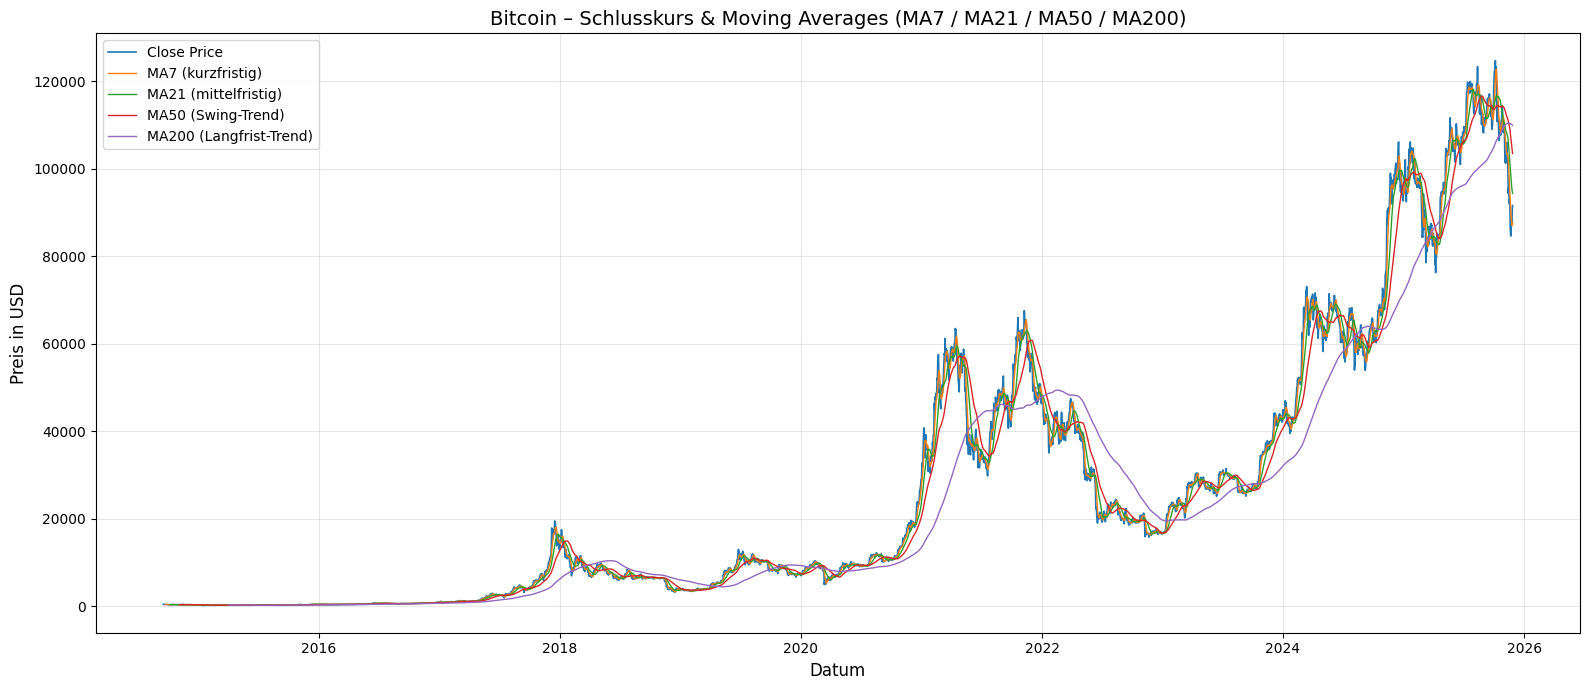

In [ ]:
# --------------------------------------------------------
# 11) Plot 1 – Bitcoin-Preis + Moving Averages / gleitende Durchschnitte
#     (MA7, MA21, MA50, MA200)
#
# Ziel:
# - Zeigt den BTC-Schlusskurs im Zeitverlauf
# - Zeigt gleichzeitig die gleitenden Durchschnitte:
#     * MA7   = kurzfristiger Trend
#     * MA21  = mittelfristiger Trend
#     * MA50  = wichtiger Swing-Trend
#     * MA200 = langfristiger Markttrend (Bull/Bear)
#
# Interpretation:
# - Liegt der Preis über MA200 → langfristiger Bullenmarkt
# - Schneidet MA50 von oben nach unten MA200 → "Death Cross"
# - Schneidet MA50 von unten nach oben MA200 → "Golden Cross"
# --------------------------------------------------------

import matplotlib.pyplot as plt

# 11.1: Sicherstellen, dass "Date" als Index gesetzt ist
#       (für schöne Zeitachsen im Plot)
df_plot = df_btc_clean.copy()
df_plot = df_plot.set_index("Date")

# 11.2: Plot-Grundgerüst erstellen
plt.figure(figsize=(16, 7))  # Breite x Höhe in Zoll

# 11.3: Schlusskurs (Close) zeichnen
plt.plot(
    df_plot.index,
    df_plot["Close"],
    label="Close Price",
    linewidth=1.2
)

# 11.4: Moving Averages zeichnen – nur, wenn sie existieren
if "MA7" in df_plot.columns:
    plt.plot(
        df_plot.index,
        df_plot["MA7"],
        label="MA7 (kurzfristig)",
        linewidth=1.0
    )

if "MA21" in df_plot.columns:
    plt.plot(
        df_plot.index,
        df_plot["MA21"],
        label="MA21 (mittelfristig)",
        linewidth=1.0
    )

if "MA50" in df_plot.columns:
    plt.plot(
        df_plot.index,
        df_plot["MA50"],
        label="MA50 (Swing-Trend)",
        linewidth=1.0
    )

if "MA200" in df_plot.columns:
    plt.plot(
        df_plot.index,
        df_plot["MA200"],
        label="MA200 (Langfrist-Trend)",
        linewidth=1.0
    )

# 11.5: Titel, Achsenbeschriftungen, Legende, Grid
plt.title("Bitcoin – Schlusskurs & Moving Averages (MA7 / MA21 / MA50 / MA200)", fontsize=14)
plt.xlabel("Datum", fontsize=12)
plt.ylabel("Preis in USD", fontsize=12)

plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)  # leichtes Grid für bessere Lesbarkeit

# 11.6: Layout optimieren und Plot anzeigen
plt.tight_layout()
plt.show()


In [ ]:
# =====================================================================
# 📊 ANALYSE: Bitcoin – Schlusskurs & Moving Averages (MA7 / MA21 / MA50 / MA200)
# =====================================================================
# Dieser Plot zeigt den Bitcoin-Schlusskurs zusammen mit vier gleitenden
# Durchschnitten (Moving Averages). Damit kann man Marktphasen, Trendwechsel
# und das Momentum deutlich besser erkennen.
#
# 🔹 Schlusskurs (blau)
#    - zeigt starke langfristige Zyklen
#    - starke Anstiege in 2018, 2020/2021, 2023–2025
#    - deutliche Crashs in 2018, 2020, 2022
#
# 🔹 MA7 (orange) – kurzfristiger Trend
#    - reagiert sehr schnell auf Preisänderungen
#    - gut für kurzfristiges Momentum
#    - viele Kreuzungen → sensibel, etwas „noisy“
#
# 🔹 MA21 (grün) – mittelfristiger Trend
#    - glatter und stabiler als MA7
#    - MA7 über MA21 → kurzfristige Stärke
#    - MA7 unter MA21 → Schwäche
#
# 🔹 MA50 (rot) – Swing-Trend
#    - zeigt stabile mittelfristige Trendrichtung
#    - steigt nachhaltig in Bullenmärkten
#    - fällt und wirkt als Widerstand in Crash-Phasen
#
# 🔹 MA200 (lila) – langfristiger Markttrend („Lebenslinie“)
#    - Preis oberhalb → langfristiger Bullenmarkt
#    - Preis unterhalb → Bärenmarkt / Risiko
#    - Golden Cross (MA50 über MA200) = Bullisches Signal
#    - Death Cross (MA50 unter MA200) = Bärisches Signal
#
# 🔎 FAZIT
#    - Visualisierung macht Marktzyklen klar sichtbar
#    - zeigt Trendstärken, Trendwechsel und Momentum
#    - Grundlage für ML-Modelle, die Marktregime erkennen sollen
#
# 👉 ML kann mit diesen Features erkennen: “Ist der Markt gerade im Aufwärtstrend oder Abwärtstrend?”


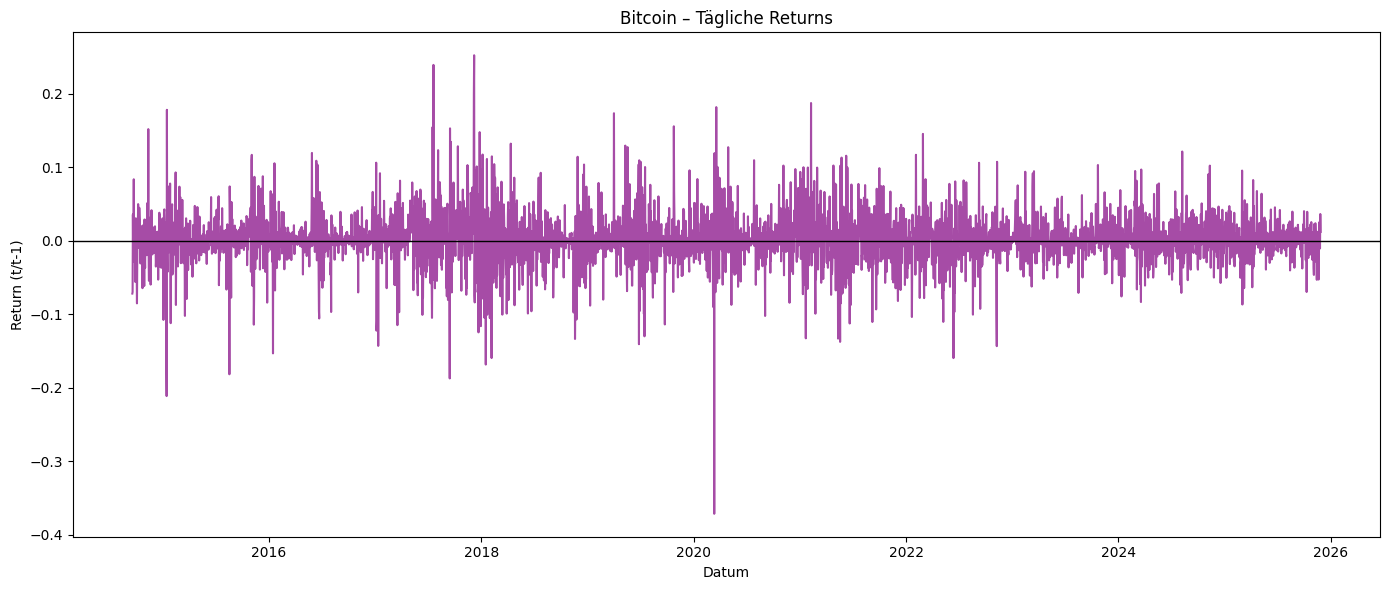

In [ ]:
import matplotlib.pyplot as plt

# ------------------------------------------
# 11.2 Plot: Tägliche Bitcoin Returns zeigt Volatilität & Ausreißer
# ------------------------------------------

plt.figure(figsize=(14,6))                     # Größe des Plots festlegen

plt.plot(                                       # Linienplot erzeugen
    df_btc_clean["Date"],                       # X-Achse → Datum
    df_btc_clean["Return"],                     # Y-Achse → tägliche Returns
    color="purple",                             # Linienfarbe
    alpha=0.7                                   # Transparenz der Linie
)

plt.axhline(0, color="black", linewidth=1)       # Horizontale Nulllinie einzeichnen

plt.title("Bitcoin – Tägliche Returns")          # Titel hinzufügen
plt.xlabel("Datum")                              # X-Achsen-Beschriftung
plt.ylabel("Return (t/t-1)")                     # Y-Achsen-Beschriftung

plt.tight_layout()                               # Layout optimieren
plt.show()                                       # Plot anzeigen


In [ ]:
# ============================================================
# 📊 Analyse: Bitcoin – Tägliche Returns (Volatilität / Risiko)
# ============================================================
# Dieser Plot zeigt die *täglichen prozentualen Veränderungen*
# des Bitcoin-Schlusskurses.
#
# 🔎 Was sehen wir hier?
#
# 1) Extreme Volatilität
#    - Bitcoin schwankt täglich häufig zwischen +10 % und –10 %.
#    - Einzelne Ausreißer liegen sogar bei –30 % oder mehr.
#    - Dies zeigt: Bitcoin ist deutlich volatiler als traditionelle Assets
#      wie Aktien oder Rohstoffe.
#
# 2) Negative Ausreißer sind stärker ausgeprägt als positive
#    - Die tiefen Stäbe nach unten zeigen Crash-Tage,
#      die historisch durch Nachrichten, Hacks, Panikverkäufe
#      oder Liquidationen ausgelöst wurden.
#
# 3) Kein stabiler Trend – Returns sind "rauschartig"
#    - Die Verteilung sieht zufällig aus (ähnlich wie bei einem Random Walk).
#    - Das bestätigt die typische Marktannahme:
#         ➜ "Preise sind trendig – Returns sind zufällig".
#
# 4) Zeithorizont-abhängige Risikoerkenntnisse
#    - 2017/2018: Hohe Schwankungen während der Dotcom-ähnlichen Krypto-Rallye.
#    - 2020/2021: Erneut extreme Volatilität (Corona-Crash → Bullenmarkt).
#    - 2023–2025: weiterhin hohe, aber etwas stabilere Schwankungen.
#
# 5) Bedeutung für Machine Learning
#    - Returns eignen sich NICHT gut als direkte Vorhersagevariable,
#      weil sie sehr noisy sind.
#    - Besser: aus Returns Features ableiten (Momentum, Volatilität etc.).
#
# 6) Bedeutung für Trader / Investoren
#    - Hohe Chancen, aber auch sehr hohes Risiko.
#    - Jeder Tag kann massive Gewinne oder Verluste bringen.
#
# Fazit:
#   Dieser Plot zeigt die "Pulsfrequenz" des Bitcoin-Marktes.
#   Er macht sichtbar, warum ML-Modelle für Krypto sehr robust sein müssen
#   und warum Momentum- und Volatilitätsmerkmale so wichtig für unsere
#   Modellierung sind.
#
#   ❌ ML kann keine genauen Preise vorhersagen
# ✔️ Aber ML kann Tendenzen erkennen (steigt/fällt)
# ✔️ Returns sind super für Klassifikation
# ============================================================


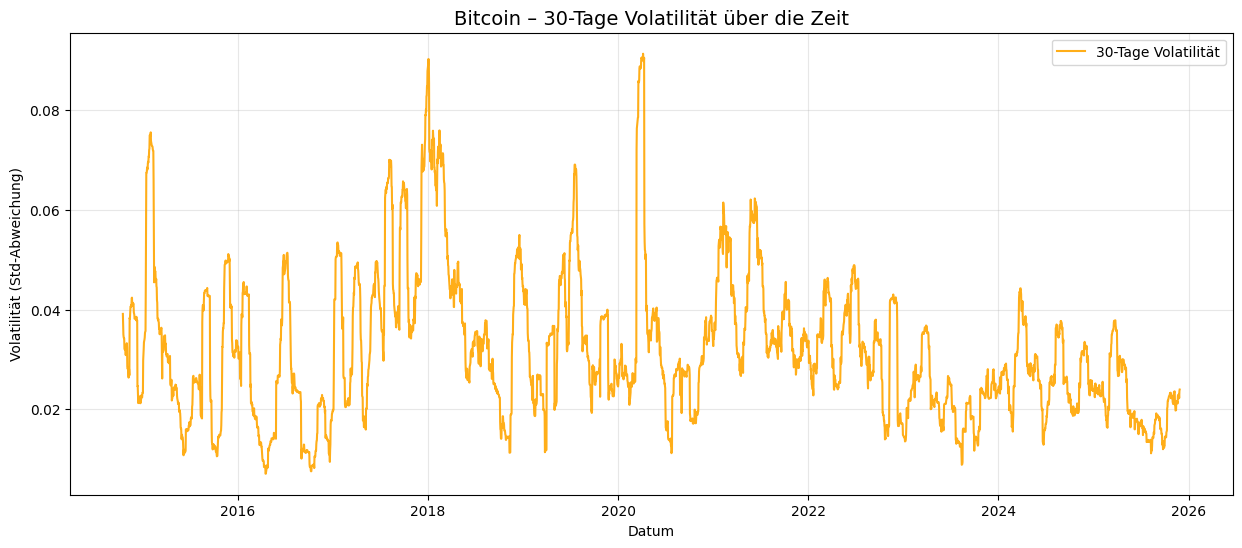

In [ ]:
# ============================================================
# 11.3 Rolling Volatility (30 Tage) – Volatilität über die Zeit
# ============================================================

plt.figure(figsize=(15, 6))

# Linie: 30-Tage-Std-Abweichung der Returns
plt.plot(df_btc_clean["Date"], df_btc_clean["Volatility30"], 
         label="30-Tage Volatilität", color="orange", alpha=0.9)

plt.title("Bitcoin – 30-Tage Volatilität über die Zeit", fontsize=14)
plt.xlabel("Datum")
plt.ylabel("Volatilität (Std-Abweichung)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Warum das super für ML ist:
# Volatilität zeigt die Marktphase, und ML liebt Marktphasen:
# Ruhiger Markt → gute Trend-Follow-Signale
# Chaotischer Markt → schlechte Signale
# Das hilft ML zu entscheiden:
# 👉 “Ist der Markt gerade stabil genug, dass Trend-Signale funktionieren?”

In [ ]:
"""
🟧 Analyse – Bitcoin 30-Tage Volatilität über die Zeit

Dieser Plot zeigt die **rollende 30-Tage-Standardabweichung** der täglichen
Returns von Bitcoin. Die Volatilität ist einer der wichtigsten Faktoren in der
Finanzwelt – sie beschreibt, wie stark der Preis schwankt.

📌 Wichtige Beobachtungen:

1) 🎢 Starke Volatilität in frühen Jahren (2015–2018)
   - BTC war ein „junges“ Asset.
   - Geringe Marktkapitalisierung → jede News erzeugte extreme Schwünge.
   - Peaks > 0.07 (7%) waren normal.

2) 🚀 Extreme Spitzen während „Krypto-Hype“-Phasen  
   Besonders 2017–2018 und 2020–2021:
   - Volatilität springt auf Werte > 0.08 (8% pro Tag!)
   - Das sind extrem hohe Werte – klassisch für spekulative Assets.

3) 📉 Volatilitäts-Crash nach 2022
   - Die Volatilität fällt sichtbar ab („Volatility Compression“).
   - Weniger große Peaks → Markt reift.
   - Institutionelle Investoren → stabilerer Preisverlauf.

4) 🧠 Bedeutet das etwas für Machine Learning?
   - JA! Volatilität = extrem wichtiger Indikator.
   - Weniger Volatilität = besser für Klassifikationsmodelle.
   - Mehr Volatilität = höhere Prognoseunsicherheit.

5) 🔥 Praktische ML-Interpretation:
   - Volatilität ist ein **Feature**, das Marktphasen klar strukturiert.
   - Typisch:
       • hohe Volatilität → Trendwende / Crash / Euphorie
       • niedrige Volatilität → Konsolidierung / Ruhe vor großem Move

6) 📈 Gesamtfazit:
   - Der Bitcoin-Markt zeigt Zyklen von hoher und niedriger Unsicherheit.
   - Die Volatilität fällt langfristig, was auf zunehmende Reife hinweist.
   - Für unser ML-Projekt ist dieses Feature hochrelevant für:
       → Marktphasen (K-Means)
       → zukünftige Richtung (RF Classifier)
       → ähnliche Situationen (KNN)

"""

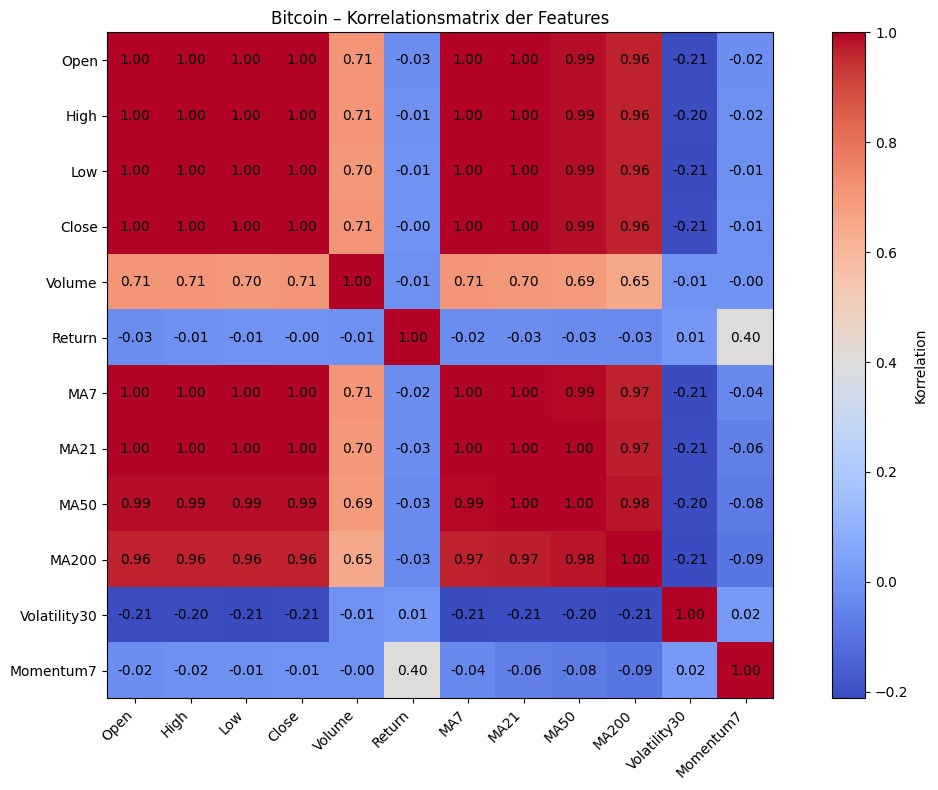

In [70]:
# ============================================================
# 12) Korrelationen zwischen Features anzeigen (Heatmap)
#     → ohne seaborn (wegen Inkompatibilität mit Python 3.11)
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

# 1. Numerische Spalten auswählen
numeric_cols = df_btc_clean.select_dtypes(include=[float, int])

# 2. Korrelationsmatrix berechnen
corr_matrix = numeric_cols.corr()

# 3. Heatmap plotten mit matplotlib
plt.figure(figsize=(12, 8))

plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Korrelation")

# Achsen-Beschriftungen
plt.xticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    ticks=np.arange(len(corr_matrix.index)),
    labels=corr_matrix.index
)

# Werte in jede Zelle schreiben
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[j, i]
        plt.text(i, j, f"{value:.2f}", ha="center", va="center", color="black")

plt.title("Bitcoin – Korrelationsmatrix der Features")
plt.tight_layout()
plt.show()


In [72]:
# """
# =============================================================
# Analyse: Korrelationsmatrix der Bitcoin-Features
# =============================================================

# Dieser Heatmap-Plot zeigt die linearen Zusammenhänge zwischen
# allen numerischen Features unseres Datensatzes. Die wichtigsten
# Erkenntnisse:

# 1) Extrem hohe Korrelationen zwischen Preis-basierten Variablen
#    ------------------------------------------------------------
#    Open, High, Low und Close haben eine Korrelation von ≈ 1.00.
#    → Das ist logisch, weil sie am selben Tag gemessen werden.
#    → Für Machine Learning bedeutet das:
#        - Diese 4 Spalten enthalten fast dieselben Informationen.
#        - Wir vermeiden Multi-Collinearity, indem wir nur *eine*
#          davon als Feature verwenden (oft: „Close“).

# 2) Moving Averages sind *nicht eigenständige* Features
#    ------------------------------------------------------------
#    MA7, MA21, MA50 und MA200 korrelieren extrem stark (0.96–1.00)
#    mit den Preis-Daten (Close/Open/...).
#    → Auch logisch, da sie lediglich geglättete Preisreihen sind.
#    → Für ML wichtig:
#        - MA7 und MA21 bieten *kurzfristige Trendinfo*
#        - MA50 und MA200 *langfristige Trendinfo*
#        - Obwohl sie hoch korrelieren, enthalten sie zeitliche
#          Struktur (Lagged Information), also trotzdem wertvoll.

# 3) Volume hat moderate Korrelation mit Preis (≈ 0.7)
#    ------------------------------------------------------------
#    → Bedeutet: Steigende Nachfrage → höheres Handelsvolumen.
#    → Volume ist ein *eigenständiges Feature* und bleibt im Modell.

# 4) Returns sind *fast unkorreliert* mit Preisen
#    ------------------------------------------------------------
#    Korrelation zwischen Return und Close ≈ -0.01.
#    → Sehr wichtig:
#        - Daily Returns verhalten sich fast „random walk“-artig.
#        - Das erklärt, warum Preisvorhersagen schwierig sind.
#        - Returns können aber in Klassifikationsaufgaben helfen
#          („steigt morgen ja/nein?“).

# 5) Momentum7 hat mittlere Korrelation mit Return (≈ 0.40)
#    ------------------------------------------------------------
#    → Momentum misst Trendstärke über 7 Tage.
#    → Das ist gut für ML:
#        - Momentum ist nicht redundant
#        - Momentum ergänzt Return sinnvoll
#        - Momentum kann zukünftige Bewegungen andeuten

# 6) Volatility30 korreliert *negativ* mit Preis (≈ -0.20)
#    ------------------------------------------------------------
#    → Typisch für BTC: Wenn Preis stark steigt → Volatilität sinkt.
#    → Sehr nützlich für ML:
#        - Preisphasen erkennen (ruhig vs. chaotisch)
#        - Marktregime klassifizieren

# -------------------------------------------------------------
# Fazit für Machine Learning
# -------------------------------------------------------------

# Behalten für ML:
# ✓ Close (einziger Preis)
# ✓ Volume (eigenständige Info)
# ✓ Return (wichtige kurzfristige Dynamik)
# ✓ MA7 / MA21 / MA50 / MA200 (Trend-Features)
# ✓ Momentum7 (Trendstärke)
# ✓ Volatility30 (Risiko/Marktregime)

# Nicht notwendig:
# ✗ Open, High, Low  → redundant zu Close

# Mit dieser Feature-Selektion vermeiden wir Overfitting,
# reduzieren redundante Inputs und behalten genau die Variablen,
# die echte zusätzliche Information tragen.

# =============================================================
# """


In [ ]:
# Was wir herausgefunden haben:
# Open, High, Low, Close = voll redundant
# MA7–MA200 = stark mit Preis korreliert (logisch)
# Returns ≈ unkorreliert → sehr wertvoll
# Volatilität korreliert leicht negativ → auch wichtig
# Momentum hat moderate Korrelation → perfekt
# Warum wichtig für ML:
# Wir sehen, welche Features wirklich etwas beitragen:

# ✔ Close
# ✔ Volume
# ✔ Returns
# ✔ MA7 / MA21 / MA50 / MA200
# ✔ Volatility30
# ✔ Momentum7

# ❌ Open, High, Low → raus! Redundanz!

In [73]:
# ============================================================
# 12) Aufbereitete Datensätze als CSV speichern
#     -> für spätere ML-Modelle & Streamlit-App
# ============================================================

import os  # os = Funktionen für Pfade / Ordner

# Pfad zum "processed"-Ordner (von /notebooks aus eine Ebene hoch)
processed_dir = "../data/processed"          # Zielordner für saubere Daten
os.makedirs(processed_dir, exist_ok=True)    # Ordner anlegen, falls er noch nicht existiert

# ------------------------------------------------------------
# 12.1) df_btc_clean speichern (ungerundet, für Machine Learning)
# ------------------------------------------------------------
clean_path = os.path.join(processed_dir, "btc_clean.csv")  # vollständiger Pfad zur Datei
df_btc_clean.to_csv(clean_path, index=False)               # DataFrame ohne Index in CSV schreiben
print(f"✅ Gespeichert: {clean_path}")                     # Bestätigung ausgeben

# ------------------------------------------------------------
# 12.2) df_btc_view speichern (gerundet, für Anzeige / Dashboards)
# ------------------------------------------------------------
view_path = os.path.join(processed_dir, "btc_view.csv")    # Pfad für Anzeige-Datei
df_btc_view.to_csv(view_path, index=False)                 # DataFrame nach CSV
print(f"✅ Gespeichert: {view_path}")                      # Bestätigung ausgeben

# ------------------------------------------------------------
# 12.3) Kontrolle: Welche Dateien liegen jetzt im processed-Ordner?
# ------------------------------------------------------------
print("\n📂 Dateien in data/processed:")
print(os.listdir(processed_dir))                           # Liste der Dateien im Ordner anzeigen


✅ Gespeichert: ../data/processed/btc_clean.csv
✅ Gespeichert: ../data/processed/btc_view.csv

📂 Dateien in data/processed:
['btc_view.csv', '.gitkeep', 'btc_clean.csv']
